## 下載模型
- shape_predictor_68_face_landmarks.dat (偵測臉部 68 個點)
- dlib_face_recognition_resnet_model_v1.dat (人臉嵌入成 128 維的向量模型)

In [1]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!wget http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2

--2020-12-07 03:38:42--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  4.80MB/s    in 20s     

2020-12-07 03:39:03 (2.99 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

--2020-12-07 03:39:03--  http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21428389 (20M)
Saving to: ‘dlib_face_recognition_resnet_model_v1.dat.bz2’

dlib_face_recogniti 100%[===================>]  20.44M  6.22MB/s    in 5.3s    

2020-12-07 03:39:09 (3.88 MB/s) - ‘dlib_face_recognition_resnet_model

In [2]:
# 解壓縮兩個檔案
!bzip2 -d ./shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d ./dlib_face_recognition_resnet_model_v1.dat.bz2

## 安裝 Dlib
Dlib 是一套基於 C++ 的機器學習工具包，藉由 Dlib 可以使用這些機器學習工具在任何的專案上，目前無論在機器人、嵌入設備、移動設備甚至是大型高效運算環境中都被廣泛使用。 

> 安裝 CPU 版本的 Dlib

In [3]:
!sudo pip uninstall dlib -y

Uninstalling dlib-19.18.0:
  Successfully uninstalled dlib-19.18.0


In [4]:
!sudo pip install -v --install-option="--no" --install-option="DLIB_USE_CUDA" dlib

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-axbivf7d
Created temporary directory: /tmp/pip-req-tracker-wzyrno5k
Created requirements tracker '/tmp/pip-req-tracker-wzyrno5k'
Created temporary directory: /tmp/pip-install-qlkrws4o
1 location(s) to search for versions of dlib:
* https://pypi.org/simple/dlib/
Getting page https://pypi.org/simple/dlib/
Found index url https://pypi.org/simple
Looking up "https://pypi.org/simple/dlib/" in the cache
Request header has "max_age" as 0, cache bypassed
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /simple/dlib/ HTTP/1.1" 200 3926
Updating cache with response from "https://pypi.org/simple/dlib/"
Caching due to etag
Analyzing links from page https://pypi.org/simple/dlib/
  

## 下載中文字體

In [5]:
# Colab 進行matplotlib繪圖時顯示繁體中文 https://colab.research.google.com/github/willismax/matplotlib_show_chinese_in_colab/blob/master/matplotlib_show_chinese_in_colab.ipynb#scrollTo=E6BV3V81MXHe
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2020-12-07 03:48:39--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.127.139, 108.177.127.100, 108.177.127.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.127.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mb05t3l1tgdc7ghkk54eqi10q4m2ud3t/1607312850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2020-12-07 03:48:41--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mb05t3l1tgdc7ghkk54eqi10q4m2ud3t/1607312850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|1

## 建立人臉資料庫

In [6]:
# 建立image資料夾
!mkdir image
# 下載照片
!wget https://i.imgur.com/2A7HbYN.jpg -O ./image/01_孫中山.jpg
!wget https://i.imgur.com/OhN4uQd.jpg -O ./image/02_周杰倫.jpg
!wget https://i.imgur.com/k5zXPIL.jpg -O ./image/03_昆凌.jpg

--2020-12-07 03:48:42--  https://i.imgur.com/2A7HbYN.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.36.193
Connecting to i.imgur.com (i.imgur.com)|151.101.36.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57570 (56K) [image/jpeg]
Saving to: ‘./image/01_孫中山.jpg’

./image/01_孫中山.j 100%[===================>]  56.22K  --.-KB/s    in 0.004s  

2020-12-07 03:48:42 (13.1 MB/s) - ‘./image/01_孫中山.jpg’ saved [57570/57570]

--2020-12-07 03:48:42--  https://i.imgur.com/OhN4uQd.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.36.193
Connecting to i.imgur.com (i.imgur.com)|151.101.36.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58611 (57K) [image/jpeg]
Saving to: ‘./image/02_周杰倫.jpg’

./image/02_周杰倫.j 100%[===================>]  57.24K  --.-KB/s    in 0.004s  

2020-12-07 03:48:42 (13.4 MB/s) - ‘./image/02_周杰倫.jpg’ saved [58611/58611]

--2020-12-07 03:48:42--  https://i.imgur.com/k5zXPIL.jpg
Resolving i.imgur.com (i.imgur.com)... 

## 下載測試照片
點選左側工具列資料夾也可以手動上傳圖片

![](https://i.imgur.com/AqJVY2c.png)

In [7]:
!wget https://i.imgur.com/jsMub7H.jpg -O ./test_孫中山.jpg
!wget https://i.imgur.com/9SnxL9K.jpg -O ./test_周杰倫.jpg
!wget https://i.imgur.com/1gKWCAc.jpg -O ./test_周杰倫2.jpg
!wget https://i.imgur.com/fEgjkG9.jpg -O ./test_昆凌.jpg
!wget https://i.imgur.com/KNMhKWO.jpg -O ./test_昆凌+周杰倫.jpg
!wget https://i.imgur.com/usMmNYO.jpg -O ./test_woman.jpg

--2020-12-07 03:48:43--  https://i.imgur.com/jsMub7H.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.36.193
Connecting to i.imgur.com (i.imgur.com)|151.101.36.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16676 (16K) [image/jpeg]
Saving to: ‘./test_孫中山.jpg’

./test_孫中山.jpg   100%[===================>]  16.29K  --.-KB/s    in 0s      

2020-12-07 03:48:43 (78.2 MB/s) - ‘./test_孫中山.jpg’ saved [16676/16676]

--2020-12-07 03:48:43--  https://i.imgur.com/9SnxL9K.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.36.193
Connecting to i.imgur.com (i.imgur.com)|151.101.36.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35222 (34K) [image/jpeg]
Saving to: ‘./test_周杰倫.jpg’

./test_周杰倫.jpg   100%[===================>]  34.40K  --.-KB/s    in 0.001s  

2020-12-07 03:48:43 (66.0 MB/s) - ‘./test_周杰倫.jpg’ saved [35222/35222]

--2020-12-07 03:48:43--  https://i.imgur.com/1gKWCAc.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.36.193
C

0.8534375822502022


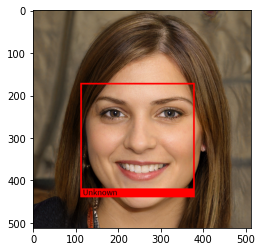

In [8]:
import sys
import os
import dlib
import glob
import numpy as np
from skimage import io
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import imutils
import warnings
warnings.filterwarnings('ignore')


# 人臉68特徵點模型路徑
predictor_path = './shape_predictor_68_face_landmarks.dat'

# 人臉辨識模型路徑
face_rec_model_path = './dlib_face_recognition_resnet_model_v1.dat'

# 比對人臉圖片資料夾名稱
faces_folder_path = './image'

# 需要辨識的人臉圖片名稱
img_path = './test_woman.jpg'

# 載入人臉檢測器
detector = dlib.get_frontal_face_detector()

# 載入人臉特徵點檢測器
sp =  dlib.shape_predictor(predictor_path)

# 載入人臉辨識檢測器
facerec = dlib.face_recognition_model_v1(face_rec_model_path)

# 比對人臉描述子列表
descriptors = []

# 比對人臉名稱列表

candidate = []
# 針對比對資料夾裡每張圖片做比對:
# 1.人臉偵測
# 2.特徵點偵測
# 3.取得描述子

for f in glob.glob(os.path.join(faces_folder_path, '*.jpg')):
    base = os.path.basename(f)

    # 依序取得圖片檔案人名
    candidate.append(os.path.splitext(base)[0])
    img = io.imread(f)

    # 1.人臉偵測
    dets = detector(img, 1)

    for (k, d) in enumerate(dets):
        # 2.特徵點偵測
        shape = sp(img, d)
        # 3.取得描述子，128維特徵向量
        face_descriptor = facerec.compute_face_descriptor(img, shape)

        # 轉換numpy array格式
        v = np.array(face_descriptor)
        descriptors.append(v)
# 針對需要辨識的人臉同樣進行處理

img = io.imread(img_path)
dets = detector(img, 1)
dist = []
pil_image = Image.fromarray(img)
draw = ImageDraw.Draw(pil_image)
for (k, d) in enumerate(dets):
    dist = []
    shape = sp(img, d)
    face_descriptor = facerec.compute_face_descriptor(img, shape)
    d_test = np.array(face_descriptor)

    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()

  # 計算歐式距離

    for i in descriptors:
        dist_ = np.linalg.norm(i - d_test)
        dist.append(dist_)

  # 將比對人名和比對出來的歐式距離組成一個dict

    c_d = dict(zip(candidate, dist))

  # 根據歐式距離由小到大排序

    cd_sorted = sorted(c_d.items(), key=lambda d: d[1])

  # 取得最短距離就為辨識出的人名

    rec_name = cd_sorted[0][0]
    print(cd_sorted[0][1])

  # 將辨識出的人名印到圖片上面
  # 轉成PIL圖片
    
    font = ImageFont.truetype("./taipei_sans_tc_beta.ttf", 18, encoding="utf-8")
    if cd_sorted[0][1] < 0.45:
        draw.rectangle(((x1, y1), (x2, y2)), outline=(0, 255, 0), width=4) # 在圖片利用Pillow module上畫出矩形框                  
        draw.rectangle(((x1, y2  - 10), (x2, y2+10)), fill=(0, 255, 0), outline=(0, 255, 0)) # 人臉辨識下方邊框(加大下方label)              
        draw.text((x1 + 6, y2 - 10), rec_name, fill=(0, 0, 0),font=font)  # 人名
    else:
        draw.rectangle(((x1, y1), (x2, y2)), outline=(255, 0, 0), width=4) # 在圖片利用Pillow module上畫出矩形框                  
        draw.rectangle(((x1, y2  - 20), (x2, y2)), fill=(255, 0, 0), outline=(255, 0, 0)) # 人臉辨識下方邊框(加大下方label)              
        draw.text((x1 + 6, y2 - 20), 'Unknown', fill=(0, 0, 0),font=font)  # 人名

plt.imshow(pil_image)
